In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_science_job.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [2]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [4]:
df.isnull().sum().max()

500

In [5]:
df.shape  # 31 columns and 284807 are Rows

(5000, 12)

In [6]:
df['job_category'].fillna(df['job_category'].mode()[0], inplace=True)
df['experience_level'].fillna(df['experience_level'].mode()[0], inplace=True)
df['salary_currency'].fillna(df['salary_currency'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        5000 non-null   object
 3   salary_currency     5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    5000 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        5000 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [8]:
# Generate descriptive statistics
description = df.describe()
print(description)

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


In [9]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

               work_year    salary  salary_in_usd
work_year       1.000000  0.027264      -0.015542
salary          0.027264  1.000000       0.010767
salary_in_usd  -0.015542  0.010767       1.000000


C:\Users\muham\AppData\Local\Temp\ipykernel_40860\2798633804.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


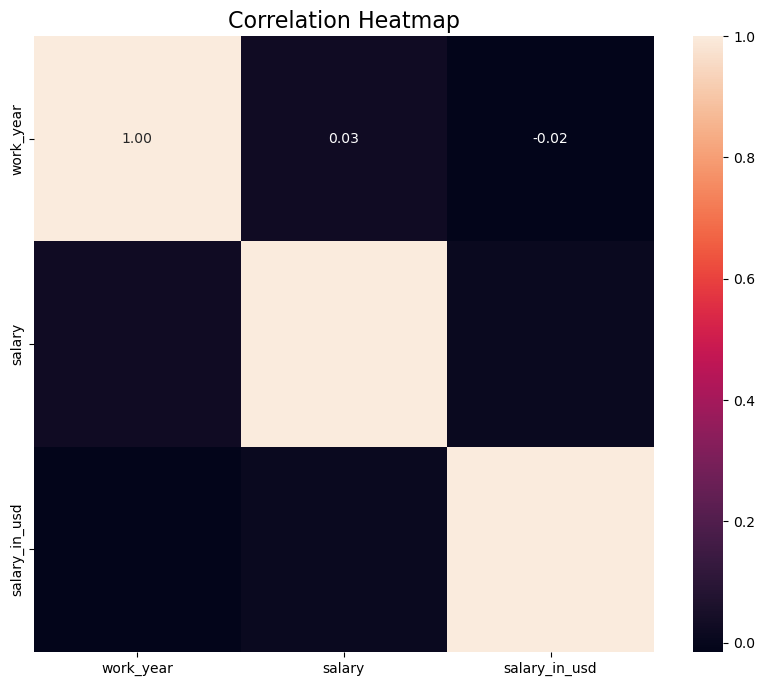

In [10]:
import seaborn as sns

def plot_heatmap():
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.title('Correlation Heatmap',fontsize=16)
    plt.savefig('Correlation Heatmap.png')
    plt.show()
    
plot_heatmap()

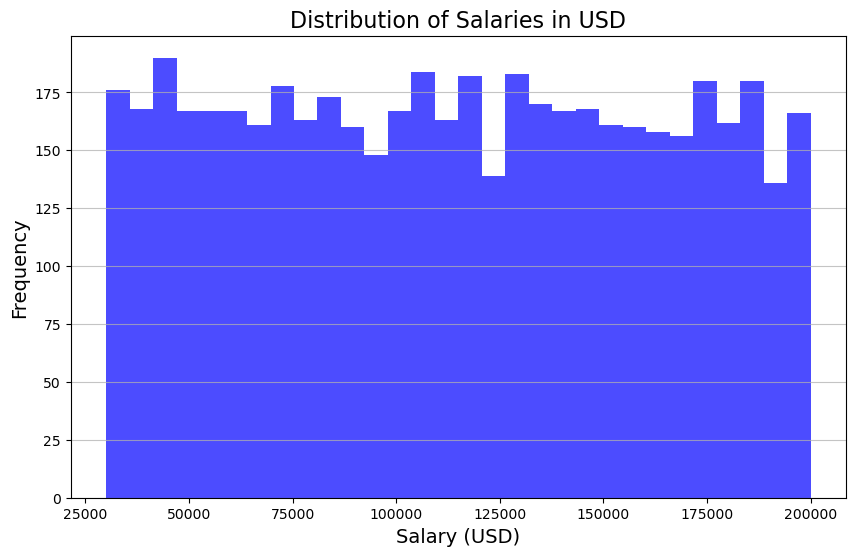

In [11]:
import matplotlib.pyplot as plt

def plot_histogram():
    plt.figure(figsize=(10,6))
    plt.hist(df['salary_in_usd'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Salaries in USD', fontsize=16)
    plt.xlabel('Salary (USD)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Distribution of Salaries in USD.png')
    plt.show()
    
plot_histogram()

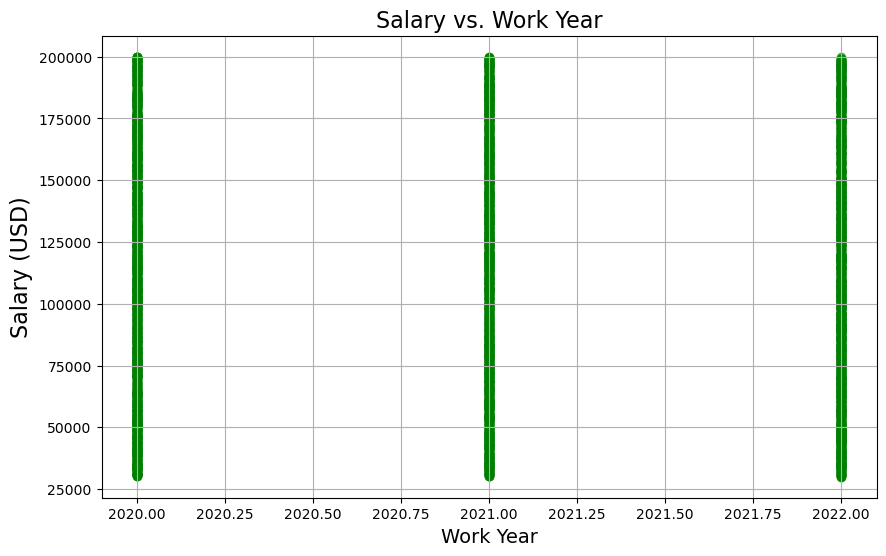

In [12]:
def plot_scatter():
    plt.figure(figsize=(10,6))
    plt.scatter(df['work_year'], df['salary_in_usd'], color='green', alpha=0.6)
    plt.title('Salary vs. Work Year', fontsize=16)
    plt.xlabel('Work Year', fontsize=14)
    plt.ylabel('Salary (USD)', fontsize=16)
    plt.grid()
    plt.savefig('Salary vs. Work Year.png')
    plt.show()
    
plot_scatter()

In [13]:
max_salary_by_role = df.groupby('job_title')['salary_in_usd'].max().reset_index()
max_salary_by_role.sort_values(by='salary_in_usd', ascending=False, inplace=True)

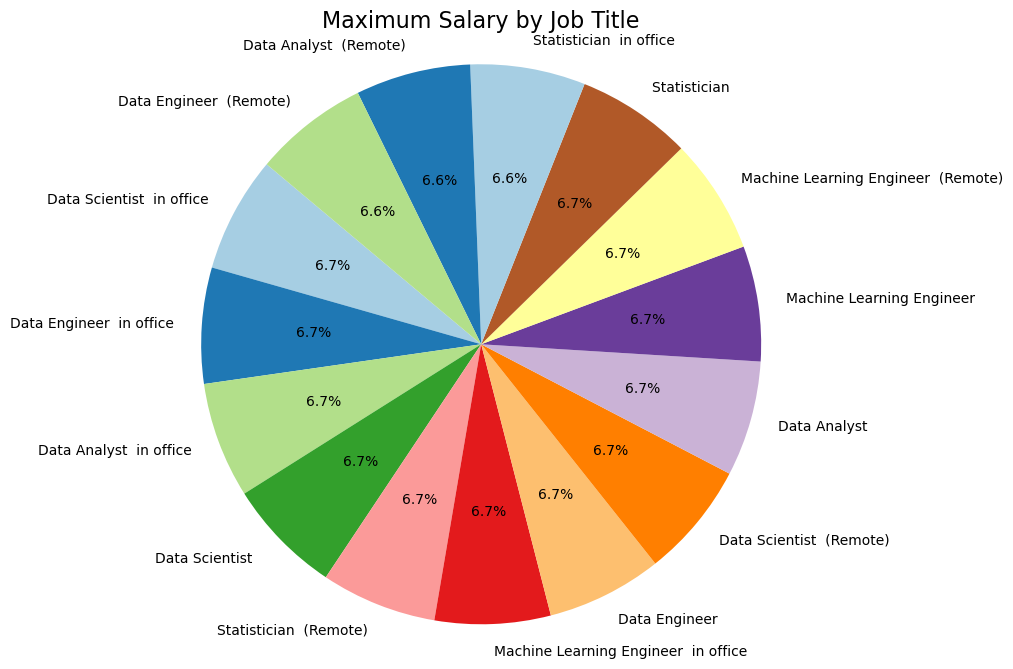

In [16]:
import matplotlib.pyplot as plt

def plot_max_salary_by_job_pie():
    plt.figure(figsize=(10, 8))
    
    # Create a pie chart
    plt.pie(max_salary_by_role['salary_in_usd'], 
            labels=max_salary_by_role['job_title'], 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=plt.cm.Paired.colors)  # Use a colormap for better colors
    
    plt.title('Maximum Salary by Job Title', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Save the figure before showing it
    plt.savefig('Maximum_Salary_by_Job_Title_Pie_Chart.png', bbox_inches='tight')
    plt.show()

plot_max_salary_by_job_pie()